# Loading a face image

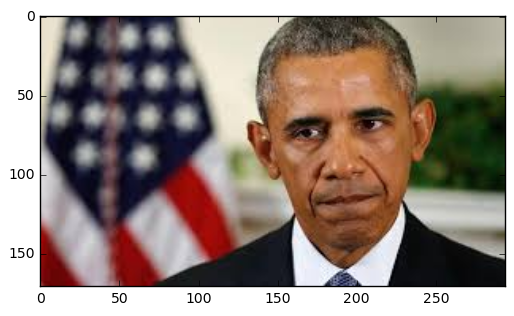

In [1]:
#loading modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

#reading the image
folder_location = "./pictures"
img =cv2.imread(folder_location+"/face_img.jpg")
img_org=img.copy()

#show the plain image
%matplotlib inline
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Face Detection

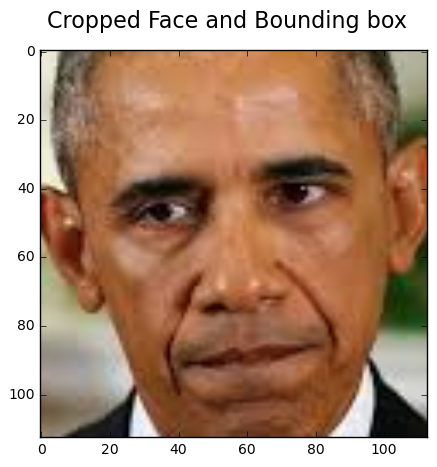

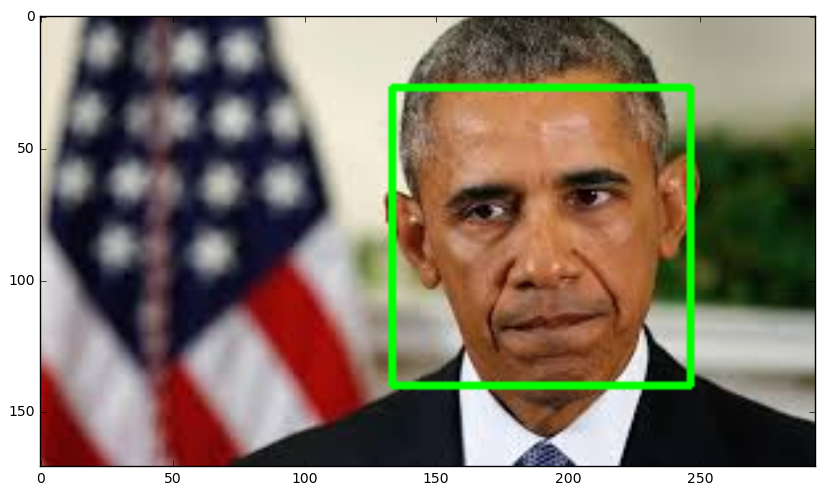

In [2]:
face_cascade = cv2.CascadeClassifier('./features/harrcascade_face.xml')
faces = face_cascade.detectMultiScale(img, 1.3, 2)

if len(faces) == 0:
    print "No Face dected"
else:
    x,y,w,h=faces[0]
    cropped_face = img[y:y+h,x:x+w]

%matplotlib inline
fig = plt.figure(figsize=(5,5))
fig.suptitle("Cropped Face and Bounding box", fontsize=16)
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
plt.show()
plt.close(fig)

#Boundary box
fig = plt.figure(figsize=(10,10))
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close(fig)

# Land mark Detection

Number of faces detected: 1


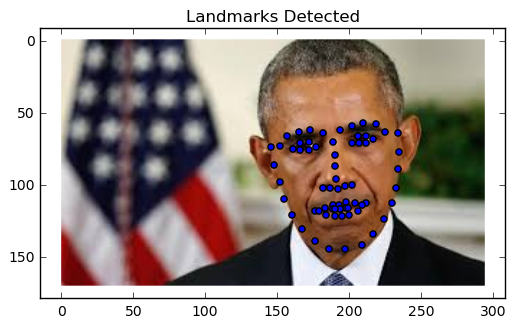

In [4]:
#detailed code : https://github.com/dougsouza/face-frontalization/blob/master/demo.py

def _shape_to_np(shape):
    xy = []
    for i in range(68):
        xy.append((shape.part(i).x, shape.part(i).y,))
    xy = np.asarray(xy, dtype='float32')
    return xy


def get_landmarks(img):
    predictor_path =  "./features/shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    try:
        lmarks = []
        dets = detector(img, 1)
        print("Number of faces detected: {}".format(len(dets)))

        if len(dets) == 0:
            return "No-Face"

        shapes = []
        for k, det in enumerate(dets):
            shape = predictor(img, det)
            shapes.append(shape)
            xy = _shape_to_np(shape)
            lmarks.append(xy)

        lmarks = np.asarray(lmarks, dtype='float32')
        # display_landmarks(img, dets, shapes)
        return lmarks
    
    except Exception as e:
        print "There is an exception raised "  + str(e)
        return "No-face"

lmarks = get_landmarks(img_org)

plt.figure()
plt.title('Landmarks Detected')
plt.imshow(img_org[:, :, ::-1])
plt.scatter(lmarks[0][:, 0], lmarks[0][:, 1])